In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import VisualDataMaker
import CNNRegressAndSoftmax as CRS
import tensorflow as tf
import keras
from keras import Input, Model

In [20]:
data, OHE_LABELS = VisualDataMaker.combine("./random_BG_IMG/n_data/*.jpg", "./original_DOB_images/*.png")
bounded_DOB = VisualDataMaker.plot_bounding_box(data)

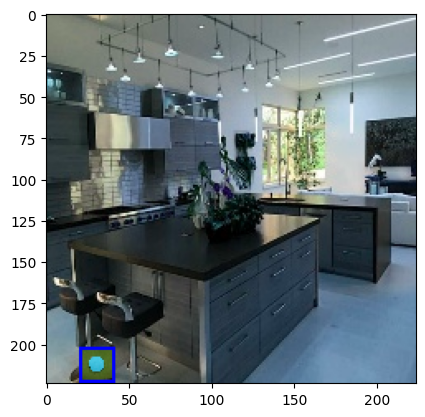

In [21]:
plt.imshow(bounded_DOB[158][0])
plt.show()

In [22]:
batch = []
regr_truth = []
class_truth = []
for i in range(len(data)):
    batch.append(data[i][0])
    regr_truth.append([data[i][2][0], data[i][2][1]])
    class_truth.append(OHE_LABELS[data[i][1]])
    

In [23]:
batch = np.array(batch)
regr_truth = np.array(regr_truth)
class_truth = np.array(class_truth)

In [24]:
batch.shape, regr_truth.shape, class_truth.shape

((2300, 224, 224, 3), (2300, 2), (2300, 10))

In [25]:
batch = tf.keras.backend.constant(batch)

In [26]:
input = Input((224, 224, 3))
x = CRS.convolutional_block(input)
box_output = CRS.regression_block_forward(x)
class_output = CRS.classification_block_forward(x)
model = keras.Model(inputs=input, outputs = [class_output, box_output])

In [27]:
pc, pb = model.predict(batch[:32])

1/1 [==============================] - 1s 520ms/step


In [28]:
OHES = []
for classification in pc:
    OHE = [0]*len(OHE_LABELS)
    label = max(classification)
    classification = list(classification)
    label_index = classification.index(label)
    OHE[label_index] = 1
    OHES.append(OHE)

In [29]:
class_predictions = []
for label in OHES:
    for k,v in OHE_LABELS.items():
        if label == v:
            class_predictions.append(k)

In [30]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss={'class': 'categorical_crossentropy', 'boundary_box': 'mse'}, metrics={'class': 'accuracy', 'boundary_box': 'mse'})

In [31]:
model_output = model.fit(batch, [class_truth, regr_truth], epochs=100, batch_size=32)

Epoch 1/100
72/72 [==============================] - 126s 2s/step - loss: 5817.7964 - class_loss: 17.8190 - boundary_box_loss: 5799.9761 - class_accuracy: 0.0543 - boundary_box_mse: 5799.9761
Epoch 2/100
72/72 [==============================] - 118s 2s/step - loss: 2658.1616 - class_loss: 3.6353 - boundary_box_loss: 2654.5271 - class_accuracy: 0.1178 - boundary_box_mse: 2654.5271
Epoch 3/100
72/72 [==============================] - 120s 2s/step - loss: 1042.3733 - class_loss: 2.1701 - boundary_box_loss: 1040.2034 - class_accuracy: 0.3122 - boundary_box_mse: 1040.2034
Epoch 4/100
72/72 [==============================] - 120s 2s/step - loss: 624.1095 - class_loss: 1.7345 - boundary_box_loss: 622.3748 - class_accuracy: 0.4917 - boundary_box_mse: 622.3748
Epoch 5/100
72/72 [==============================] - 118s 2s/step - loss: 391.5916 - class_loss: 1.1384 - boundary_box_loss: 390.4532 - class_accuracy: 0.6974 - boundary_box_mse: 390.4532
Epoch 6/100
72/72 [==============================]

In [34]:
pc, pb = model.predict(batch[:2])

1/1 [==============================] - 0s 147ms/step


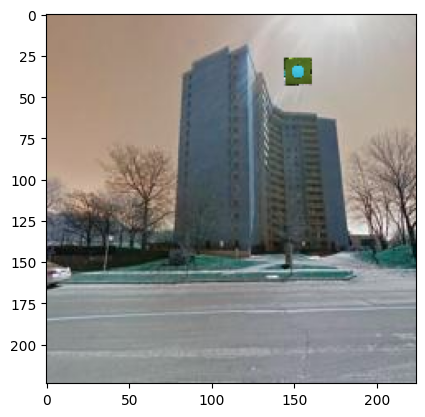

In [51]:
plt.imshow(data[0][0])
plt.show()

In [53]:
CRS.OHE_encoder(pc[0])

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [55]:
data[0][2]

(144, 27)

In [56]:
pb[0]

array([152.14978 ,  29.535902], dtype=float32)